
# 9.3: Deeper Euler Method

In [7]:

%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

import numpy as np
import matplotlib as plt
from ch09.functions import *
from ch09.vectors import *
from ch09.draw2d import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Calculating and plotting positions using acceleration and velocities

In [11]:
s = (0,0)
v = (1,0)
a = (0, 0.2)
interval = 2
steps = 5
positions = [s]
t = 0
for i in range(0, steps):
    t += interval
    s = add( s, scale(interval, v ) )
    positions.append(s)
    v = add(v, scale(interval, a))

positions

[(0, 0),
 (2, 0),
 (4, 0.8),
 (6, 2.4000000000000004),
 (8, 4.800000000000001),
 (10, 8.0)]

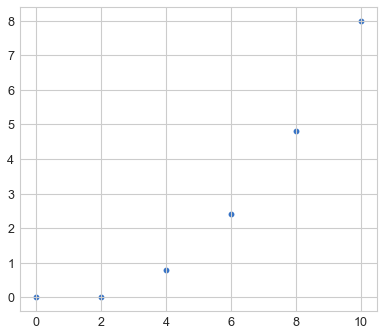

In [12]:
plt.scatter([t for (t, _) in positions], [s for (_, s) in positions])